<a href="https://colab.research.google.com/github/Vaishnavi123-abhi/NNDL-HW2/blob/main/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
path_1 = '/content/gdrive/MyDrive/NN&DeepLearning_ICP2_Summer_SourceCode/NN&DeepLearning_Lesson7_SourceCode/breastcancer.csv'

In [57]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn = Sequential() # create model
my_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn.add(Dense(1, activation='sigmoid')) # output layer
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)
print(my_nn.summary())
print(my_nn.evaluate(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 76.6329 - acc: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 19.4226 - acc: 0.6150
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 6.4147 - acc: 0.3779
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.8668 - acc: 0.7676
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1683 - acc: 0.6925
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8649 - acc: 0.8474
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7740 - acc: 0.8169
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7270 - acc: 0.8498
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5440 - acc: 0.8803
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4294 - acc: 0.9038
Epoch 11/100
14/14 [==============================] - 0s 

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.2508 - accuracy: 0.9252 - val_loss: 0.1188 - val_accuracy: 0.9636
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.0770 - val_accuracy: 0.9752
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0710 - accuracy: 0.9781 - val_loss: 0.0745 - val_accuracy: 0.9757
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0706 - val_accuracy: 0.9791
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0630 - val_accuracy: 0.9825
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.0650 - val_accuracy: 0.9821
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0345 - 

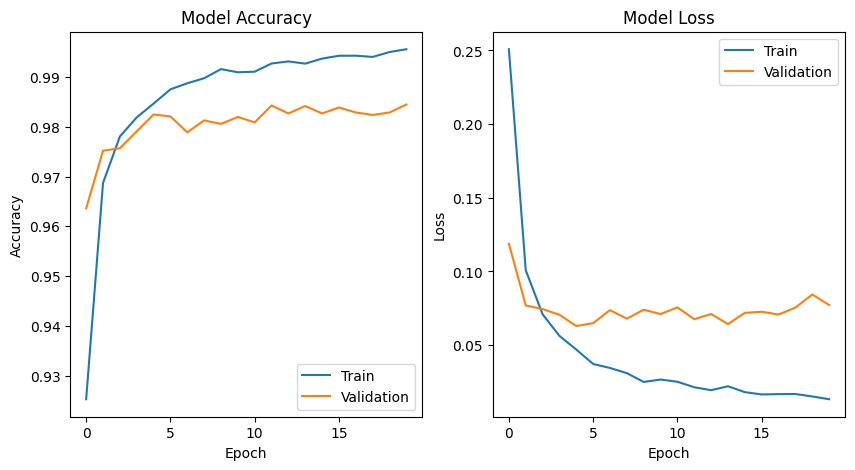

In [58]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model and record the training history
history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                    epochs=20, batch_size=128)

# plot the training and validation accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()
